In [54]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [55]:
%matplotlib inline

In [56]:
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [57]:
dta['affair'] = (dta.affairs > 0).astype(int)

In [58]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467464
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


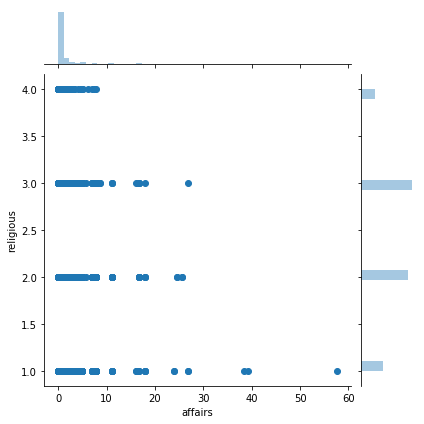

In [12]:
sns.jointplot(dta['affairs'],dta['religious'])

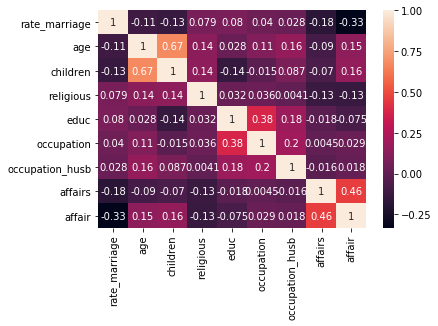

In [36]:
sns.heatmap(dta.corr(),annot=True)

In [59]:
def createQuantile(df,fieldName):
    dd = pd.qcut(df[fieldName],q=[0, .25, .5, .75, 1.])
    dd = pd.Categorical(dd)
    dd = pd.get_dummies(dd,prefix=fieldName,drop_first=True)
    df = pd.concat([df.drop(fieldName,axis=1,inplace=True),dd],axis=1)
    return df

In [60]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [61]:
dta2=createQuantile(dta,'yrs_married')

In [62]:
dta2.columns

Index(['yrs_married_(2.5, 6.0]', 'yrs_married_(6.0, 16.5]',
       'yrs_married_(16.5, 23.0]'],
      dtype='object')

In [63]:
dta.columns

Index(['rate_marriage', 'age', 'children', 'religious', 'educ', 'occupation',
       'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [64]:
dta3=pd.concat([dta,dta2],axis=1)

In [65]:
dta3.head()

,rate_marriage,age,children,religious,educ,occupation,occupation_husb,affairs,affair,"yrs_married_(2.5, 6.0]","yrs_married_(6.0, 16.5]","yrs_married_(16.5, 23.0]"
0,3.0,32.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,0,1,0
1,3.0,27.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,0,1,0
2,4.0,22.0,0.0,1.0,16.0,3.0,5.0,1.400000,1,0,0,0
3,4.0,37.0,4.0,3.0,16.0,5.0,5.0,0.727273,1,0,1,0
4,5.0,27.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,0,1,0


In [37]:
def splitTrainTest(df,targetVariable):
     x = df.drop(targetVariable, axis = 1)
     y = df[targetVariable]
     X_train, X_test, Y_train, Y_test =  train_test_split(x, y, test_size = 0.2, random_state = 5)
     print(X_train.shape)
     print(X_test.shape)
     print(Y_train.shape)
     print(Y_test.shape)
     return X_train, X_test, Y_train, Y_test

In [66]:
dta3.drop('affairs',axis=1,inplace=True)

In [67]:
x = dta3.drop('affair', axis = 1)

In [83]:
y = dta3['affair']

In [43]:
X_train, X_test, Y_train, Y_test=splitTrainTest(dta3,'affair')

(5092, 10)
(1274, 10)
(5092,)
(1274,)


In [86]:
lg = LogisticRegression()
lg.fit(X_train, Y_train)
print(lg.score(X_train,Y_train))
print(lg.score(X_test,Y_test))

0.725058915947
0.729199372057


In [102]:
x = dta3.drop('affair', axis = 1)
y = dta3['affair']

poly = PolynomialFeatures(2)
Xpoly = poly.fit_transform(x)

In [103]:
Xpoly

array([[  1.,   3.,  32., ...,   1.,   0.,   0.],
       [  1.,   3.,  27., ...,   1.,   0.,   0.],
       [  1.,   4.,  22., ...,   0.,   0.,   0.],
       ..., 
       [  1.,   5.,  22., ...,   0.,   0.,   0.],
       [  1.,   5.,  32., ...,   0.,   0.,   0.],
       [  1.,   4.,  22., ...,   0.,   0.,   0.]])

In [104]:
x.shape

(6366, 10)

In [107]:
Xpoly.shape

(6366, 66)

In [108]:
x=Xpoly

In [110]:
dta3.columns

Index(['rate_marriage', 'age', 'children', 'religious', 'educ', 'occupation',
       'occupation_husb', 'affair', 'yrs_married_(2.5, 6.0]',
       'yrs_married_(6.0, 16.5]', 'yrs_married_(16.5, 23.0]'],
      dtype='object')